In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from data_lib import Data
import numpy as np

In [14]:
Data_for_clustering = Data('chinese-word-list.txt')

In [15]:
Data_for_clustering.drawings(1)

100%|█████████████████████████████████████████████████████████████████████████████| 8175/8175 [00:13<00:00, 593.02it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


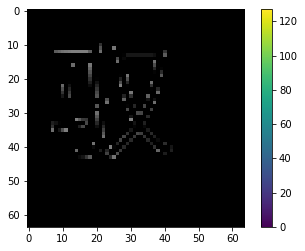

驭


In [16]:
num = np.random.randint(0, len(Data_for_clustering.X_data))
fig = plt.figure()
plt.imshow(Data_for_clustering.X_data[num])
plt.colorbar()
plt.grid(False)
plt.show()

print(Data_for_clustering.Y_data[num])

In [17]:
 Data_for_clustering.lable()

In [18]:
print(np.shape(Data_for_clustering.Y_classes))
print(np.shape(Data_for_clustering.X_data)) #check

(8175, 8175)
(8175, 64, 64, 3)


In [20]:
model_resnet = load_model('resnet50_model.hdf5')

In [21]:
model_resnet.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [9]:
model_resnet.evaluate(Data_for_clustering.X_data, Data_for_clustering.Y_classes)

256/256 [==============================] - 42s 165ms/step - loss: 0.1585 - accuracy: 0.9601


[0.15849635004997253, 0.9601223468780518]

In [9]:
Data_for_clustering.hieroglyphs(model_resnet.predict(Data_for_clustering.X_data)[:5]) 

array(['抔', '访', '洗', '赵', '吡'], dtype='<U1')

In [10]:
Data_for_clustering.Y_data[:5]

['抔', '访', '洗', '赵', '吡']

In [22]:
from tensorflow.keras.models import Model
model_resnet= Model(inputs=model_resnet.input, outputs=model_resnet.layers[-2].output)
model_resnet.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

In [23]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30).fit_predict(preprocessing.normalize(model_resnet(Data_for_clustering.X_data)))

In [13]:
[Data_for_clustering.Y_data[i] for i in [index for (index, item) in enumerate(kmeans) if item == 9]]

['岱',
 '帚',
 '茚',
 '语',
 '岢',
 '卺',
 '篙',
 '督',
 '嚅',
 '责',
 '带',
 '苦',
 '芾',
 '借',
 '哲',
 '葫',
 '眘',
 '僔',
 '窗',
 '鲁',
 '荀',
 '苪',
 '詟',
 '自',
 '誉',
 '甘',
 '晦',
 '笃',
 '嵩',
 '悟',
 '誊',
 '筲',
 '匍',
 '含',
 '哥',
 '倚',
 '昔',
 '黹',
 '蔺',
 '甫',
 '需',
 '简',
 '管',
 '萜',
 '僻',
 '肯',
 '胄',
 '黄',
 '卤',
 '蒔',
 '筒',
 '菁',
 '岺',
 '晋',
 '昺',
 '萄',
 '肴',
 '苍',
 '甾',
 '畜',
 '窝',
 '曹',
 '簧',
 '岧',
 '喾',
 '俘',
 '偌',
 '雋',
 '背',
 '帝',
 '告',
 '雪',
 '莴',
 '郜',
 '甭',
 '白',
 '苗',
 '胬',
 '膏',
 '官',
 '芑',
 '倭',
 '昝',
 '雷',
 '箸',
 '宦',
 '蒂',
 '亩',
 '崙',
 '骨',
 '茜',
 '凿',
 '菩',
 '节',
 '岳',
 '峇',
 '倦',
 '訇',
 '富',
 '俦',
 '俤',
 '筍',
 '萤',
 '书',
 '莒',
 '蓍',
 '音',
 '啬',
 '着',
 '尊',
 '窜',
 '佾',
 '鼋',
 '宫',
 '贫',
 '肓',
 '善',
 '茵',
 '沓',
 '蛋',
 '崮',
 '奇',
 '旮',
 '茴',
 '暂',
 '皙',
 '伶',
 '啭',
 '者',
 '奁',
 '俉',
 '镥',
 '畄',
 '笤',
 '苘',
 '垂',
 '酋',
 '首',
 '誓',
 '昚',
 '葡',
 '皆',
 '害',
 '巷',
 '警',
 '卷',
 '芭',
 '笞',
 '臼',
 '茸',
 '闺',
 '赀',
 '帑',
 '宥',
 '百',
 '芮',
 '蔷',
 '杏',
 '马',
 '算',
 '青',
 '鹊',
 '赏',
 '肾',
 '吉',
 '臂',
 '箇'

In [24]:
 Data_for_clustering.drawings(79)

100%|█████████████████████████████████████████████████████████████████████████| 645825/645825 [21:17<00:00, 505.69it/s]


In [25]:
clasters_kmeans = tf.keras.utils.to_categorical(list(kmeans) * 80,  dtype='int8')

In [16]:
print(np.shape(clasters_kmeans))
print(np.shape(Data_for_clustering.X_data))

(654000, 30)
(654000, 64, 64, 3)


In [26]:
from tensorflow import keras
optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)

In [27]:
MobileNet = tf.keras.applications.MobileNet(input_shape=(64, 64, 3), weights=None, classes=30, classifier_activation="softmax")

In [28]:
MobileNet.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
#обучение первого уровня
from tensorflow.keras.callbacks import ModelCheckpoint 
filepath_to_raw_model="content/MobileNet_current_30.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath_to_raw_model, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

callbacks_lists = [checkpoint]

In [34]:
MobileNet.fit(Data_for_clustering.X_data, clasters_kmeans, epochs = 20, batch_size = 32,validation_split = 0.1, callbacks=callbacks_lists,)

Epoch 1/20
18394/18394 [==============================] - ETA: 0s - loss: 1.4471 - accuracy: 0.5419
Epoch 00001: val_loss improved from inf to 0.81601, saving model to content\MobileNet_current_30.hdf5
18394/18394 [==============================] - 12067s 656ms/step - loss: 1.4471 - accuracy: 0.5419 - val_loss: 0.8160 - val_accuracy: 0.7217
Epoch 2/20
18394/18394 [==============================] - ETA: 0s - loss: 0.6562 - accuracy: 0.7741
Epoch 00002: val_loss improved from 0.81601 to 0.39064, saving model to content\MobileNet_current_30.hdf5
18394/18394 [==============================] - 24205s 1s/step - loss: 0.6562 - accuracy: 0.7741 - val_loss: 0.3906 - val_accuracy: 0.8665
Epoch 3/20
18394/18394 [==============================] - ETA: 0s - loss: 0.3695 - accuracy: 0.8721
Epoch 00003: val_loss improved from 0.39064 to 0.28693, saving model to content\MobileNet_current_30.hdf5
18394/18394 [==============================] - 9805s 533ms/step - loss: 0.3695 - accuracy: 0.8721 - val_los

KeyboardInterrupt: 

In [85]:
from tensorflow.keras import datasets, layers, models, losses
def LeNet(nb_classes, input_shape = (64, 64, 3)):
    X_input = layers.Input(input_shape)
    X = layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same")(X_input)
    X = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(X)
    X = layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(X)
    X = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(X)
    X = layers.Flatten()(X)
    X = layers.Dense(120, activation='tanh')(X)
    X = layers.Dense(84, activation='tanh')(X)
    X = layers.Dense(nb_classes, activation='softmax')(X)
    model = Model(inputs = X_input, outputs = X, name='LeNet')
    return model
    

In [91]:
import codecs
from tensorflow.keras.callbacks import ModelCheckpoint #обучение второго уровня
with codecs.open("Lenet.txt", "w", encoding = 'utf-8') as file:
    for clust in range(30):
        X = np.array([Data_for_clustering.X_data[i] for i in [index for (index, item) in enumerate(list(kmeans)*80) if item == clust]])
        Y = [Data_for_clustering.Y_data[i] for i in [index for (index, item) in enumerate(list(kmeans)*80) if item == clust]]
        file.write("Lenet"+str(clust) + ":")
        file.write(str(Y))
        file.write("\n")
        encoder = LabelEncoder().fit(Y)
        Y = tf.keras.utils.to_categorical(encoder.transform(Y),  dtype='int8')
        filepath_to_raw_model="Lenet"+str(clust)+".hdf5"
        checkpoint = ModelCheckpoint(filepath=filepath_to_raw_model, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
        callbacks_list = [checkpoint]
        while True:
            print("Lenet"+str(clust) + " " + str(len(Y)))
            LeModel = LeNet(X.shape[0]/80)
            LeModel.compile(optimizer='adam',loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])
            history = LeModel.fit(X, Y, epochs = 5, batch_size = 32,validation_split = 0.1, callbacks=callbacks_list,)
            if(history.history['loss'][-1] < 0.5):
                break
        

Lenet0 22800
Epoch 1/5
641/642 [============================>.] - ETA: 0s - loss: 5.0489 - accuracy: 0.1672
Epoch 00001: val_loss improved from inf to 4.04102, saving model to Lenet0.hdf5
642/642 [==============================] - 53s 83ms/step - loss: 5.0487 - accuracy: 0.1673 - val_loss: 4.0410 - val_accuracy: 0.3724
Epoch 2/5
641/642 [============================>.] - ETA: 0s - loss: 2.6596 - accuracy: 0.6258
Epoch 00002: val_loss improved from 4.04102 to 1.83955, saving model to Lenet0.hdf5
642/642 [==============================] - 53s 82ms/step - loss: 2.6590 - accuracy: 0.6259 - val_loss: 1.8396 - val_accuracy: 0.7417
Epoch 3/5
641/642 [============================>.] - ETA: 0s - loss: 0.9545 - accuracy: 0.8930
Epoch 00003: val_loss improved from 1.83955 to 0.78702, saving model to Lenet0.hdf5
642/642 [==============================] - 53s 82ms/step - loss: 0.9546 - accuracy: 0.8930 - val_loss: 0.7870 - val_accuracy: 0.9053
Epoch 4/5
641/642 [============================>.] - ET

In [92]:
model_mobile = load_model("content/MobileNet_current_30.hdf5")

In [50]:
cluster = np.argmax(model_mobile.predict(Data_for_clustering.X_data[:5]), axis = 1)

In [93]:
cluster

array([10, 28, 26, 16, 25], dtype=int64)

In [54]:
for i in range(5):
    model_lenet = load_model("Lenet"+str(cluster[i])+".hdf5")
    with codecs.open("Lenet.txt", "r", encoding = 'utf-8') as file:
         for line in file:
            if str(cluster[i]) in line:
                encoder = LabelEncoder().fit(line[10:-3].split("', '"))
                break
    print(encoder.inverse_transform(np.argmax(model_lenet.predict(Data_for_clustering.X_data[i:i+1])))
              

SyntaxError: unexpected EOF while parsing (<ipython-input-54-e7400b865ba8>, line 9)

In [94]:
model_lenet = load_model("Lenet"+str(cluster[0])+".hdf5")

In [112]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)#тестирование
for i in range(5):
    model_lenet = load_model("Lenet"+str(cluster[i])+".hdf5")
    with codecs.open("Lenet.txt", encoding = 'utf-8') as file:
        for line in file:
            if str(cluster[i]) in line:
            #res = line[10:-3].split("', '")
                encoder = LabelEncoder().fit(line[10:-3].split("', '"))
                break
    print(encoder.inverse_transform(np.argmax(model_lenet.predict(Data_for_clustering.X_data[i:i+1]), axis = 1)))

['垈']
['佺']
['鱹']
['缵']
['椝']


In [109]:
Data_for_clustering.Y_data[:5]

['垈', '佺', '鱹', '缵', '椝']